In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("bhp.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
min_threshold,max_threshold=df.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [11]:
df2=df[(df.price_per_sqft> min_threshold) & (df.price_per_sqft<max_threshold)]

In [12]:
df2.shape

(13172, 7)

In [13]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

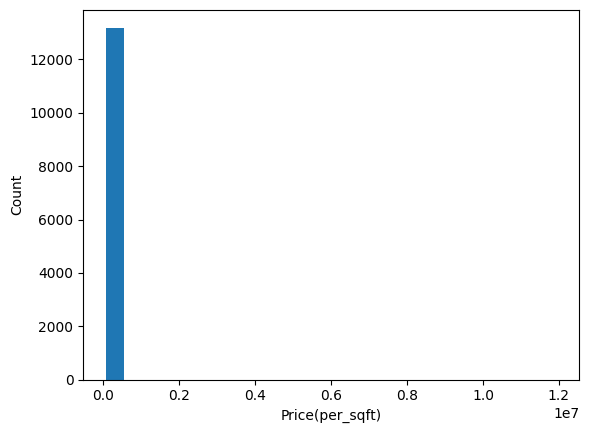

In [22]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price(per_sqft)')
plt.ylabel('Count')
plt.show()

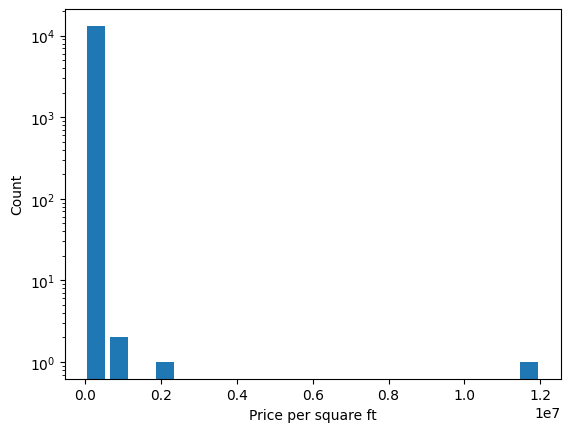

In [24]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [26]:
df2.shape

(13172, 7)

In [27]:
max_limit=df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()

In [28]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000
9791,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9808,Uttarahalli,6 Bedroom,1200.0,6.0,330.0,6,27500
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153
11661,other,4 Bedroom,1200.0,4.0,375.0,4,31250
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000
8454,other,3 Bedroom,7800.0,3.0,2000.0,3,25641
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
9786,2nd Stage Nagarbhavi,5 Bedroom,1200.0,5.0,290.0,5,24166
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666


In [29]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

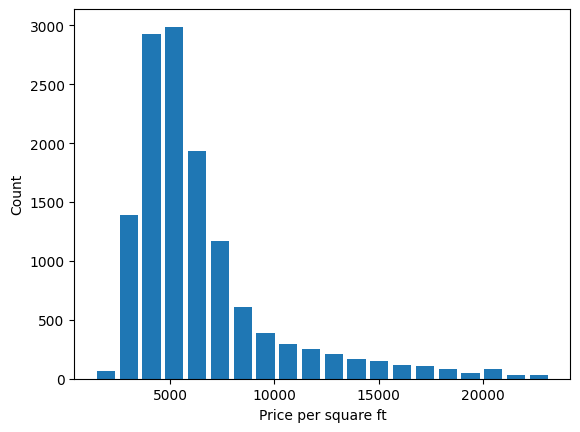

In [30]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

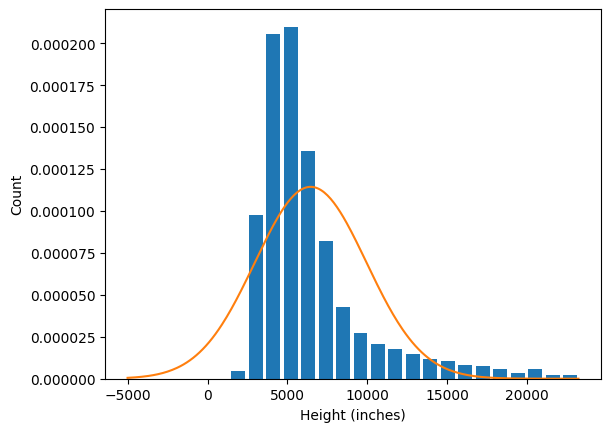

In [31]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [32]:

df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\dell\AppData\Local\Temp\ipykernel_14828\2659031811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3435,Hennur,2 BHK,1231.0,2.0,48.00,2,3899,-0.667626
7281,Yelahanka,2 BHK,1200.0,2.0,55.00,2,4583,-0.502449
1234,Kudlu Gate,3 BHK,1535.0,3.0,78.00,3,5081,-0.382189
111,Electronic City,3 BHK,1530.0,2.0,45.90,3,3000,-0.884722
2276,Whitefield,2 BHK,1155.0,2.0,60.00,2,5194,-0.354901
1013,other,1 BHK,950.0,1.0,40.00,1,4210,-0.592524
12026,Electronic City Phase II,2 BHK,1165.0,2.0,33.64,2,2887,-0.912010
4072,Rayasandra,2 BHK,1016.0,2.0,58.00,2,5708,-0.230777
2330,Pattandur Agrahara,3 BHK,1767.0,3.0,98.00,3,5546,-0.269898
5201,Sarjapur Road,3 BHK,1700.0,3.0,95.00,3,5588,-0.259756


In [33]:

outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [34]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666,4.830294
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246,4.728869
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166,4.226578
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500,5.031693
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725


In [36]:

df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape
df2.shape[0] - df4.shape[0]

125